In [1]:
import torch as th
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from papersim.sim import GoodFlowSim
from papersim.modules.risk_generator import Risk, RiskGen
from papersim.modules.sim_modules import ProductionModule, TransportModule

In [3]:
prod_matrix = th.tensor(np.array([[0, 0, 0, 0],
                                  [0, 0, 0, 0],
                                  [1, 1, 0, 0],
                                  [0, 0, 1, 0]]), dtype=th.int32)

mod_a = ProductionModule(0, 0, 0, prod_matrix[0], 10)
mod_b = ProductionModule(1, 1, 1, prod_matrix[1], 10)
mod_c = ProductionModule(2, 2, 2, prod_matrix[2], 10)
mod_d = ProductionModule(3, 3, 3, prod_matrix[3], 10)

tra_ac = TransportModule(4, 0, 0, 0, 2, 10)
tra_bc = TransportModule(5, 1, 1, 1, 2, 10)
tra_cd = TransportModule(6, 2, 2, 2, 3, 10)

prod_mods = [mod_a, mod_b, mod_c, mod_d]
trans_mods = [tra_ac, tra_bc, tra_cd]

risks = [Risk(0.001, 0.1, 10, [0]),  # Software brakedown, once a year
         Risk(0.002, 0.2, 10, [1]),
         Risk(0.003, 0.3, 20, [2]),
         Risk(0.001, 0.1, 5, [2])]

In [4]:
loss_f0 = lambda a, b: (1 - (a - b) / a)
loss_f1 = lambda a, b: th.where(a == b, 0, 1)
loss_f2 = lambda a, b: (1 - (th.pow(a - b, 2) / th.pow(a, 2)))
loss_fs = [loss_f0, loss_f1, loss_f2]

modes = ['r', 'i', 't']
factors = np.arange(1, 10) / 10

t_run = 100
num_results = 100

sim = GoodFlowSim(prod_mods, trans_mods, risks, 4, num_runs=num_results, device='cuda')

In [5]:
results = pd.DataFrame()

for k, mode in enumerate(modes, 0):
    for i, loss_f in enumerate(loss_fs, 0):
        results = pd.DataFrame()
        for j, factor in enumerate(factors, 0):
            losses_risk = sim.evaluate_risks(t_run, loss_f, factor=factor, mode=mode)
            print(k, i, j, losses_risk.to('cpu'))

0 0 0 tensor([0.9510, 0.9513, 0.9452, 0.9528, 0.9503])
0 0 1 tensor([0.9481, 0.9507, 0.9448, 0.9533, 0.9469])
0 0 2 tensor([0.9519, 0.9465, 0.9508, 0.9548, 0.9478])
0 0 3 tensor([0.9498, 0.9496, 0.9457, 0.9549, 0.9458])
0 0 4 tensor([0.9455, 0.9469, 0.9519, 0.9564, 0.9474])
0 0 5 tensor([0.9494, 0.9518, 0.9484, 0.9580, 0.9500])
0 0 6 tensor([0.9516, 0.9472, 0.9493, 0.9608, 0.9492])
0 0 7 tensor([0.9471, 0.9499, 0.9513, 0.9591, 0.9505])
0 0 8 tensor([0.9511, 0.9455, 0.9525, 0.9643, 0.9494])
0 1 0 tensor([0.1100, 0.1023, 0.1019, 0.0877, 0.1024])
0 1 1 tensor([0.1108, 0.1139, 0.1195, 0.0983, 0.0961])
0 1 2 tensor([0.1039, 0.0950, 0.0941, 0.1067, 0.1250])
0 1 3 tensor([0.1052, 0.1192, 0.1010, 0.0793, 0.1058])
0 1 4 tensor([0.1049, 0.1078, 0.0930, 0.0792, 0.1082])
0 1 5 tensor([0.1028, 0.0829, 0.1054, 0.0938, 0.1040])
0 1 6 tensor([0.1051, 0.0957, 0.1170, 0.0839, 0.0950])
0 1 7 tensor([0.0983, 0.1005, 0.0882, 0.0677, 0.1216])
0 1 8 tensor([0.0818, 0.0983, 0.0956, 0.0607, 0.0954])
0 2 0 tens

TypeError: exp() takes 1 positional argument but 2 were given

In [31]:
print(losses_risk / losses_risk[0])

tensor([1.0000, 0.9806, 0.9372, 0.4093, 0.9294])


In [14]:
losses_risk = sim.evaluate_risks(t_run, loss_f0)
print(losses_risk / losses_risk[0])

0 / 12
1 / 12
2 / 12
3 / 12
4 / 12
5 / 12
6 / 12
7 / 12
8 / 12
9 / 12
10 / 12
11 / 12
tensor([1.0000, 0.9686, 1.0021, 1.0015, 0.9990, 0.9890, 1.0008, 1.0022, 1.0021,
        1.0013, 1.0053, 1.0014])


Storage
0


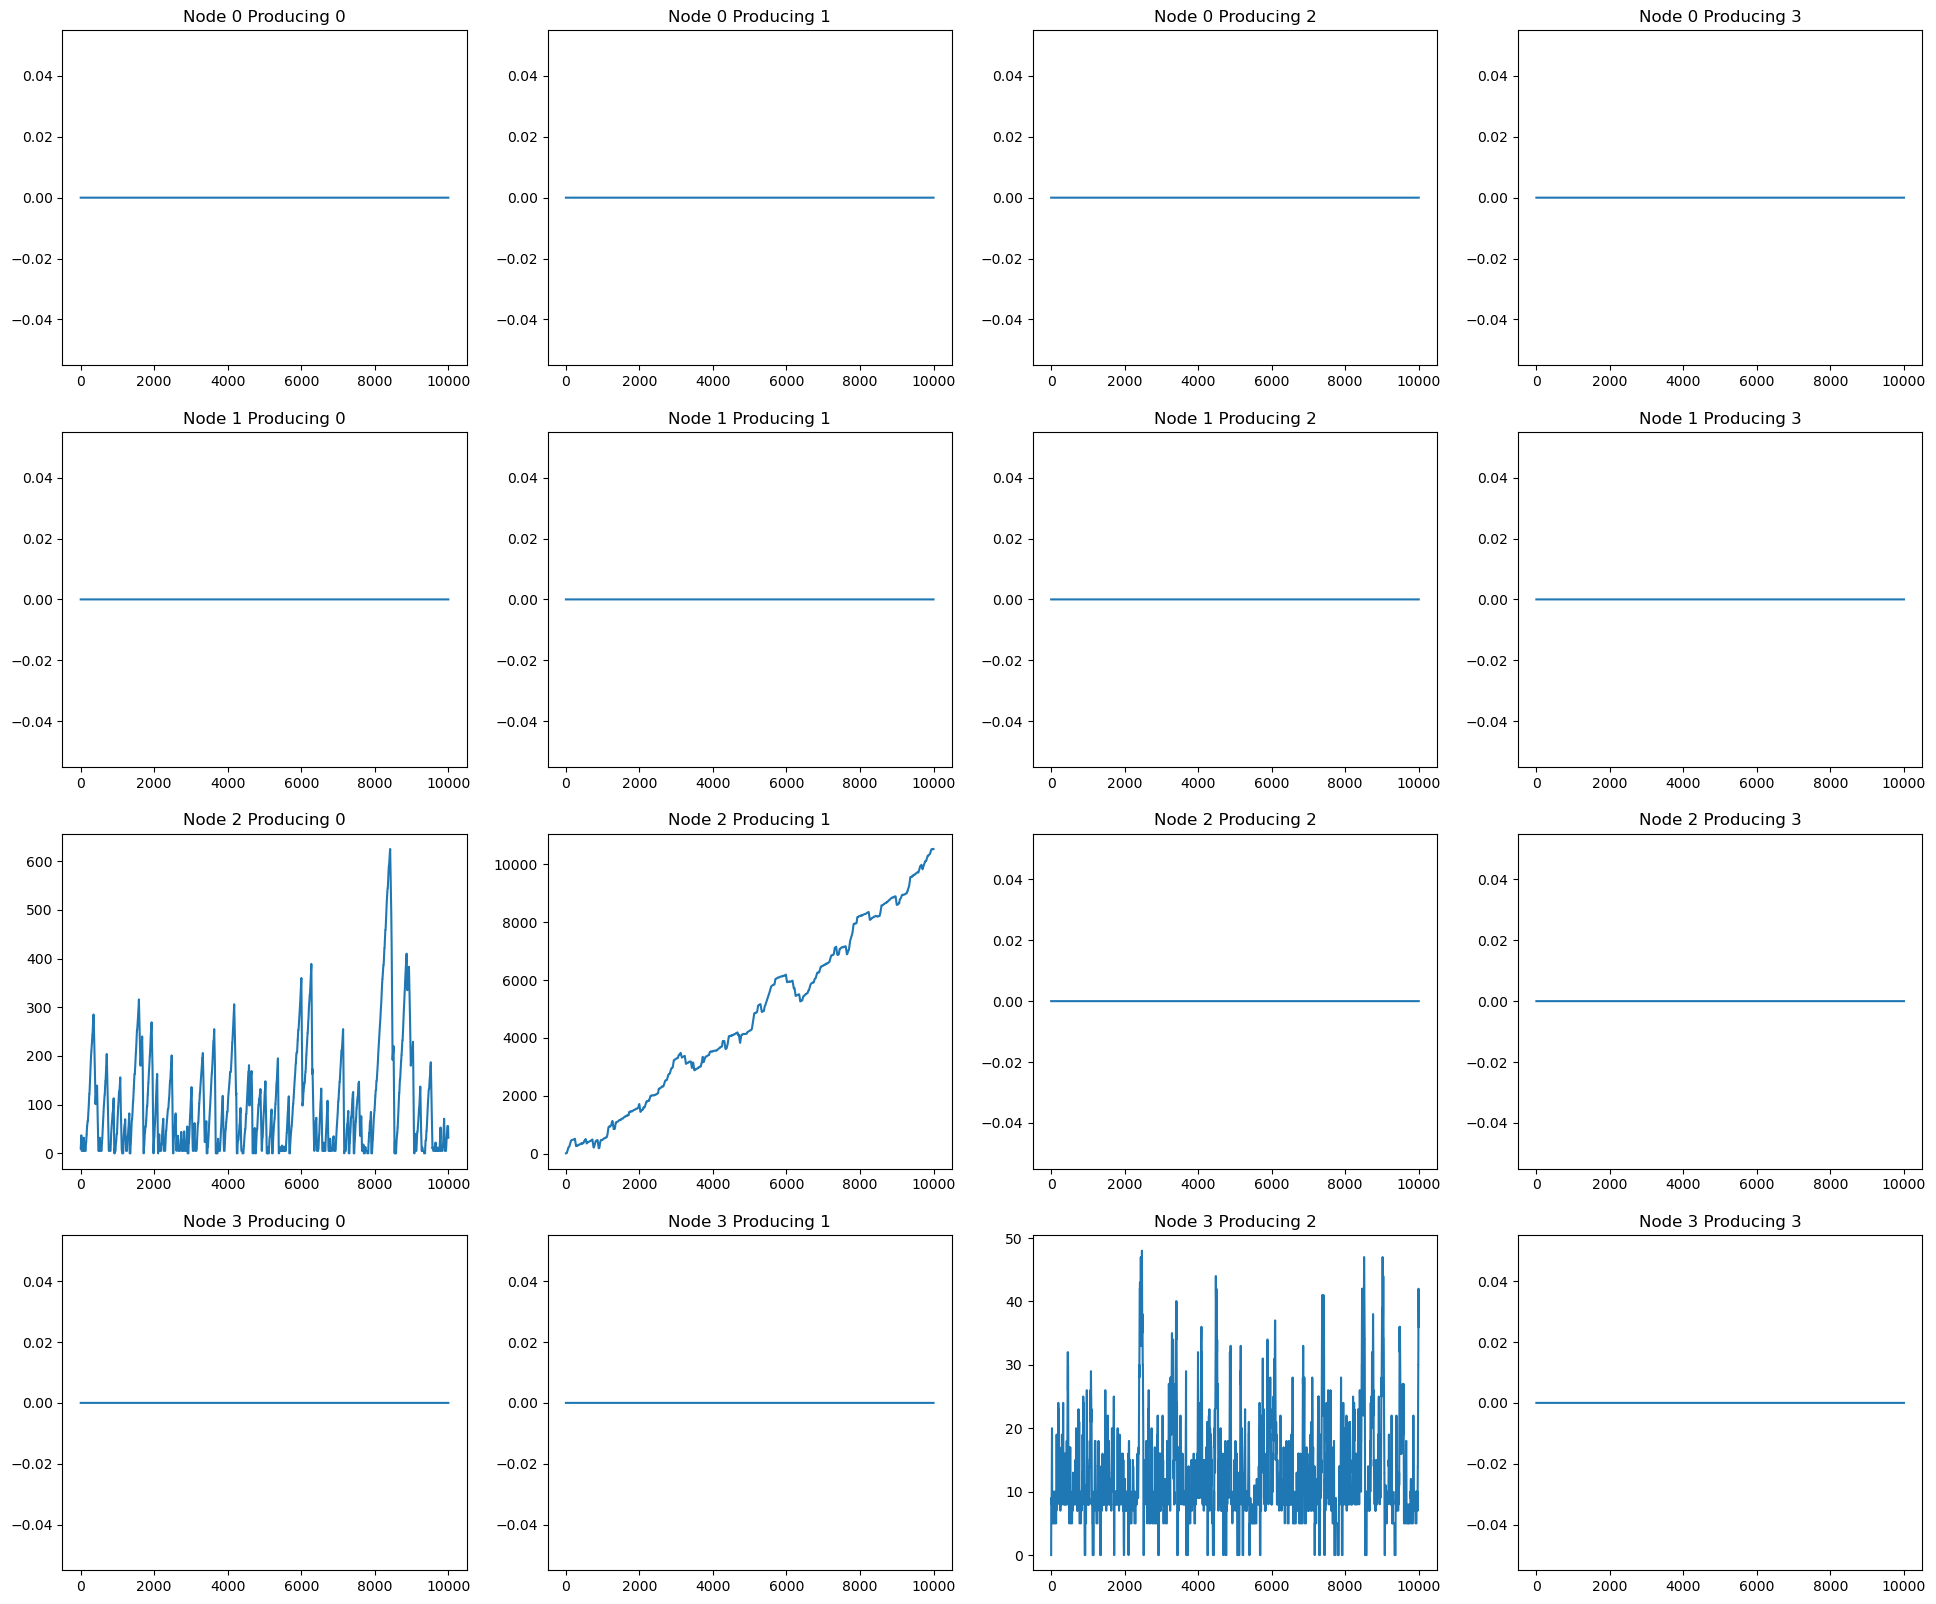

1


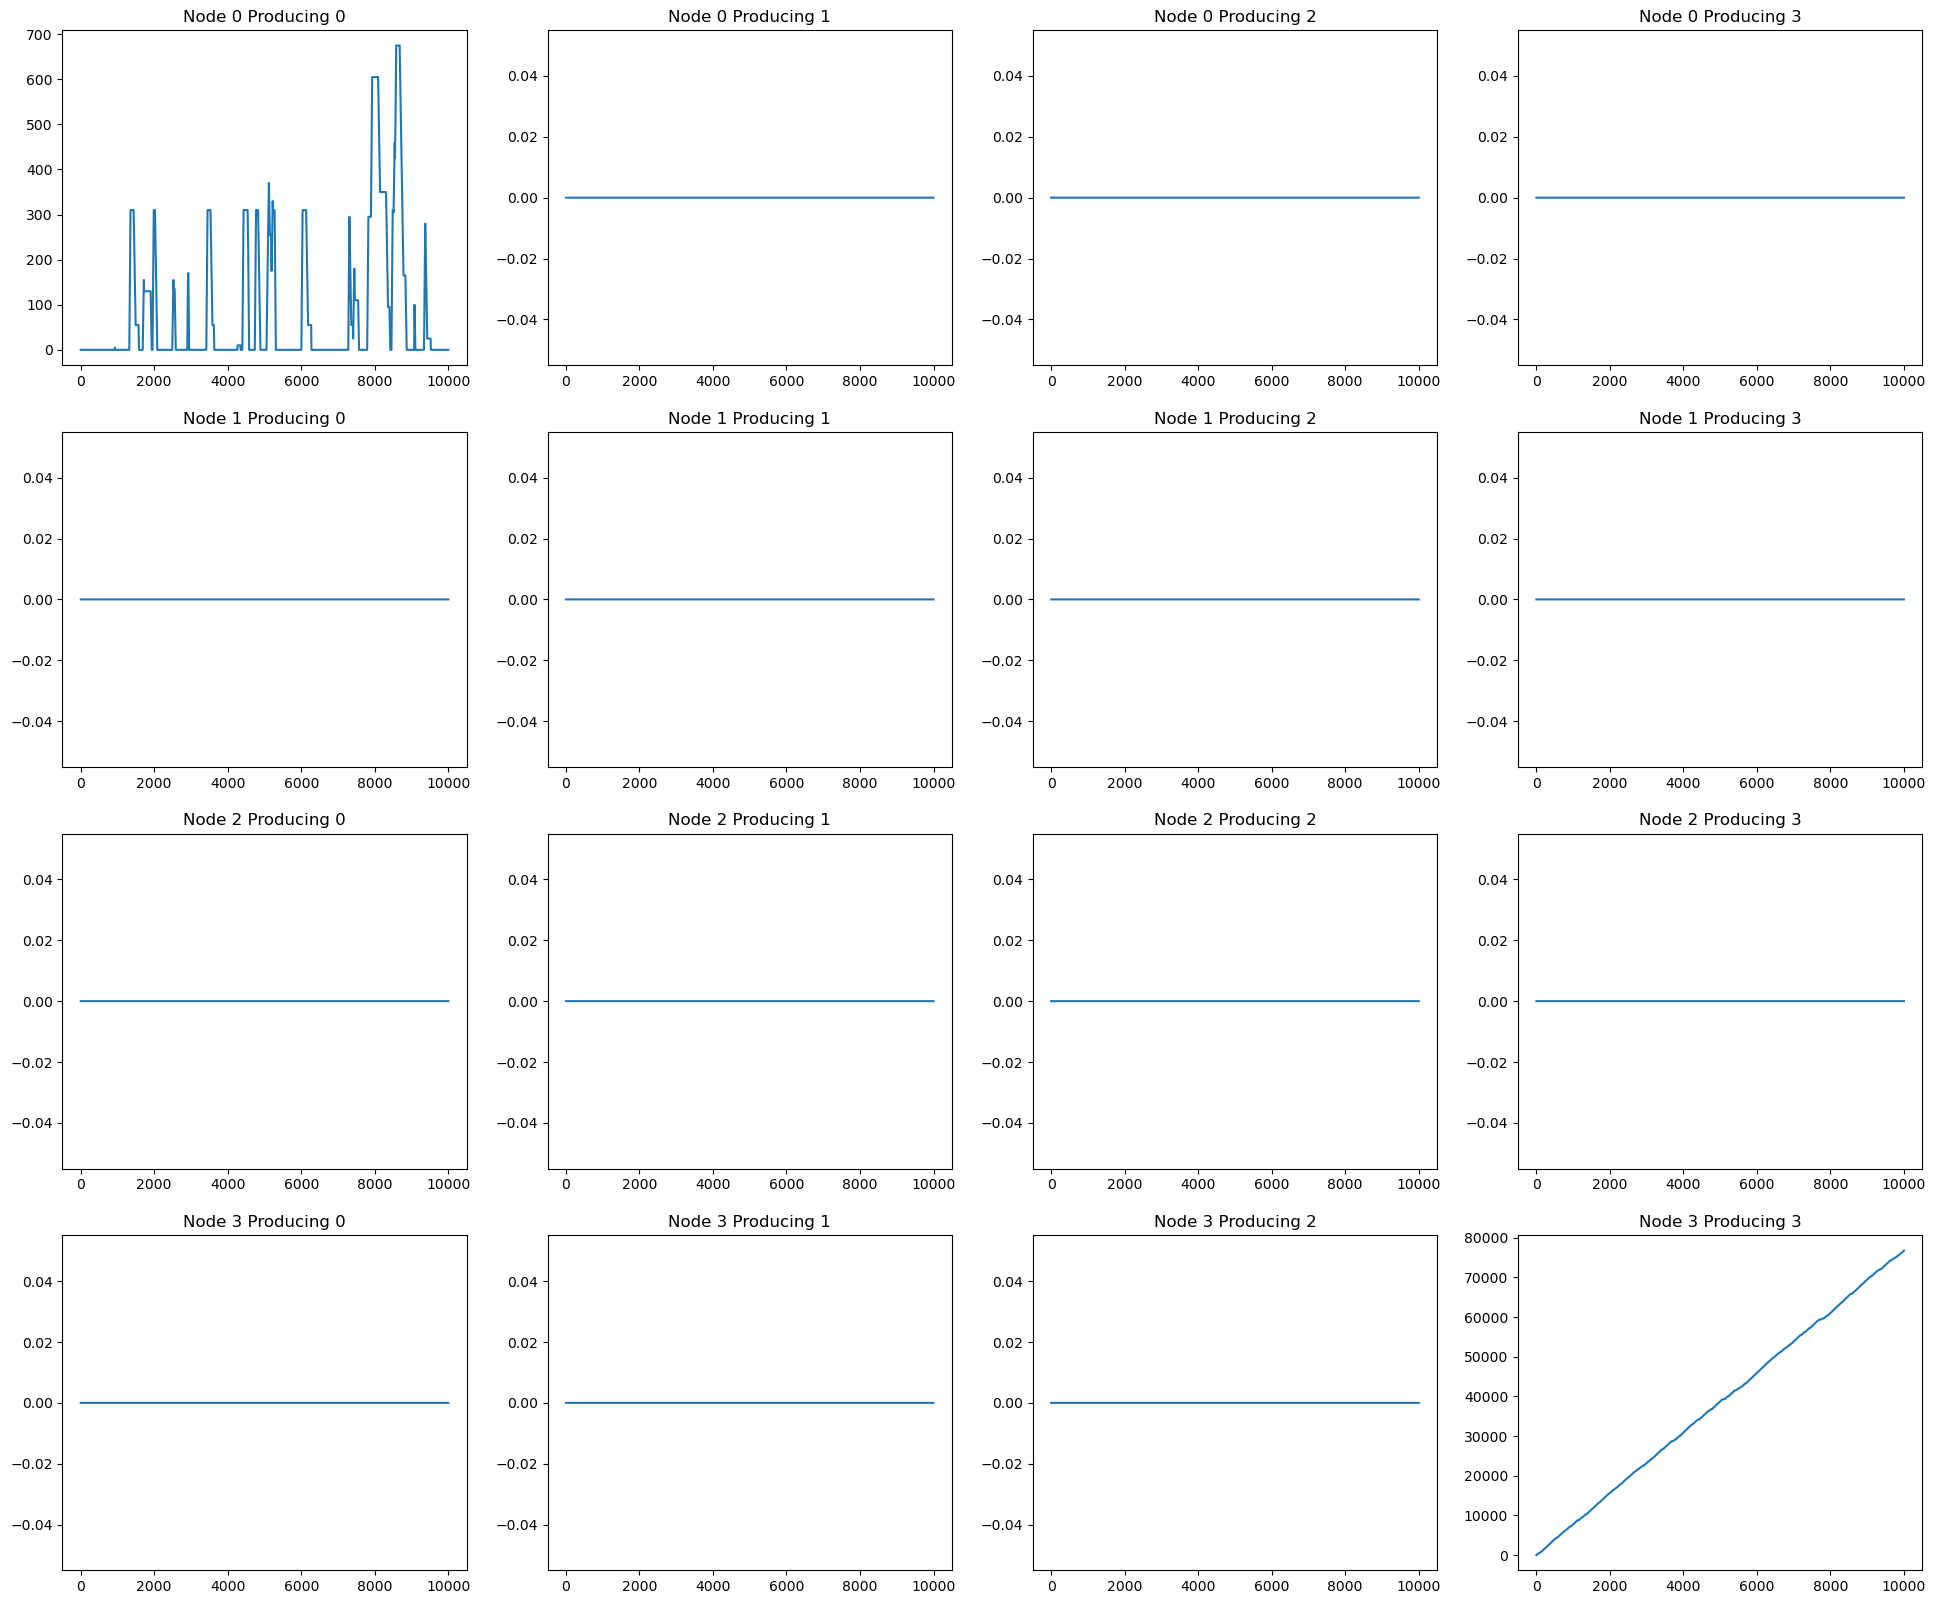

Production


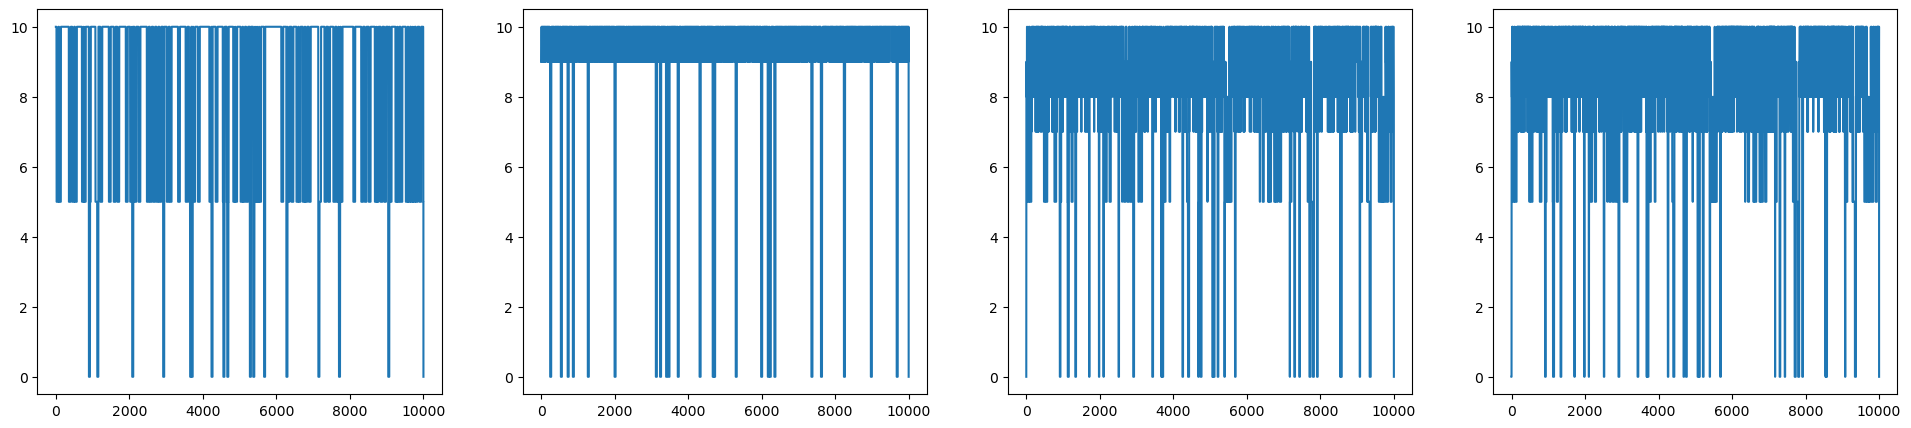

Transport


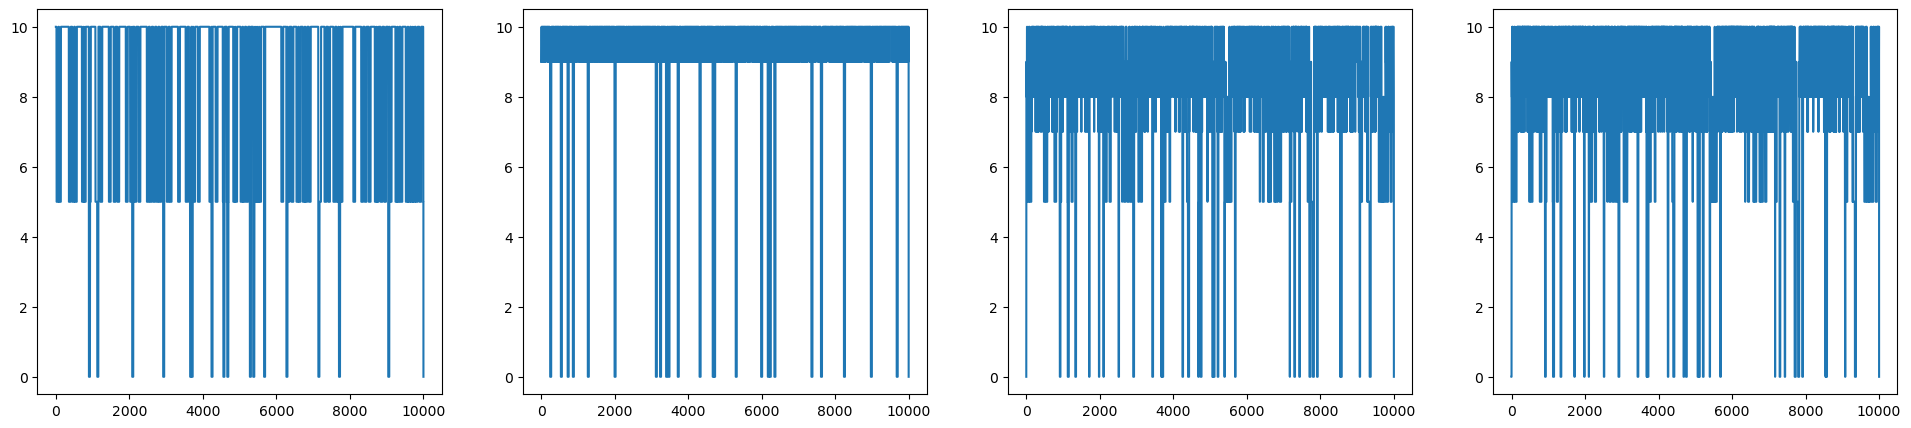

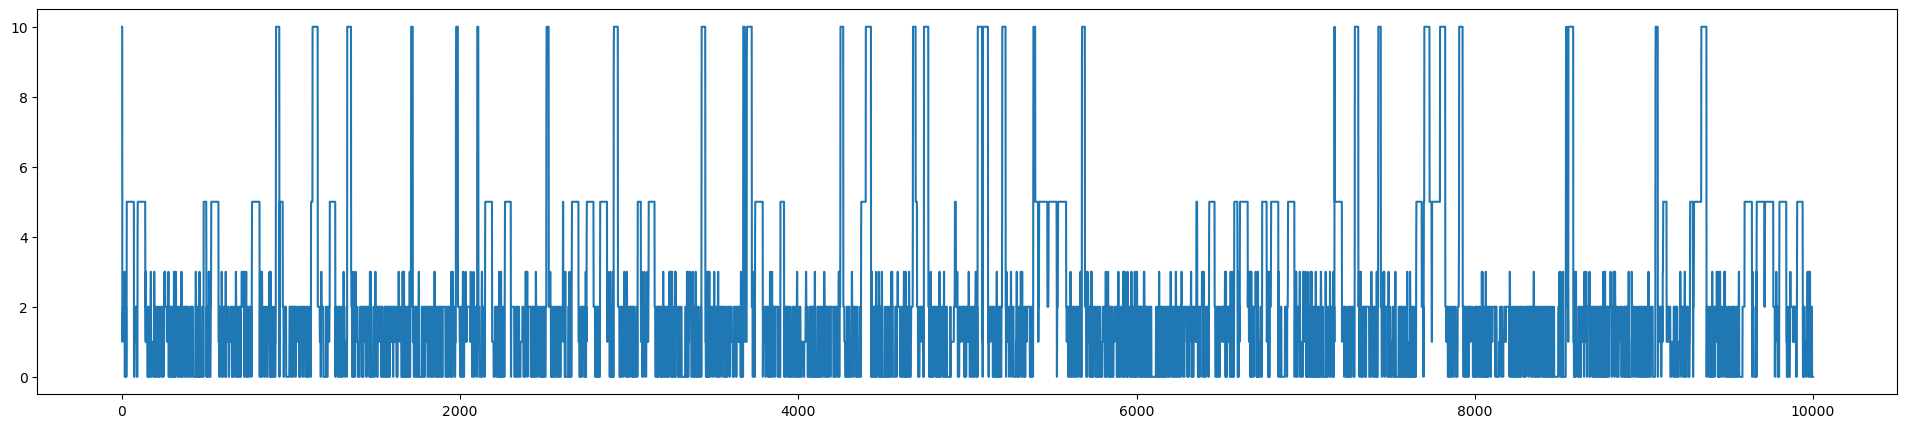

In [13]:
print('Storage')

for k in range(2):
    print(k)
    fig, axs = plt.subplots(inv.shape[-2], inv.shape[-1], figsize=(24, 20))
    for i in range(inv.shape[-2]):
        for j in range(inv.shape[-1]):
            axs[i, j].plot(inv[:, 0, k, i, j])
            axs[i, j].set_title("Node " + str(i) + ' Producing ' + str(j))

    plt.show()

print('Production')

fig, axs = plt.subplots(1, prod.shape[-1], figsize=(24, 5))

for i in range(prod.shape[-1]):
    axs[i].plot(prod[:, 0, i])

plt.show()

print('Transport')

fig, axs = plt.subplots(1, trans.shape[-1], figsize=(24, 5))

for i in range(trans.shape[-1]):
    axs[i].plot(trans[:, 0, i])

plt.show()

fig, axs = plt.subplots(1, 1, figsize=(24, 5))

axs.plot(loss[:, 0])

plt.show()